In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
salesdec = pd.read_csv ("Video_Games_Sales_as_at_22_Dec_2016.csv")
salesdec.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
salesdec.describe()

/Users/macbook/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,NaN,NaN,NaN
50%,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,NaN,NaN,NaN
75%,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,NaN,NaN,NaN
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [4]:
salesdec.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [95]:
salesdec.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

## Global Sales

In [5]:
#most game releases
sd = salesdec
v = sd[['Genre','Global_Sales']]
v.Genre.value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

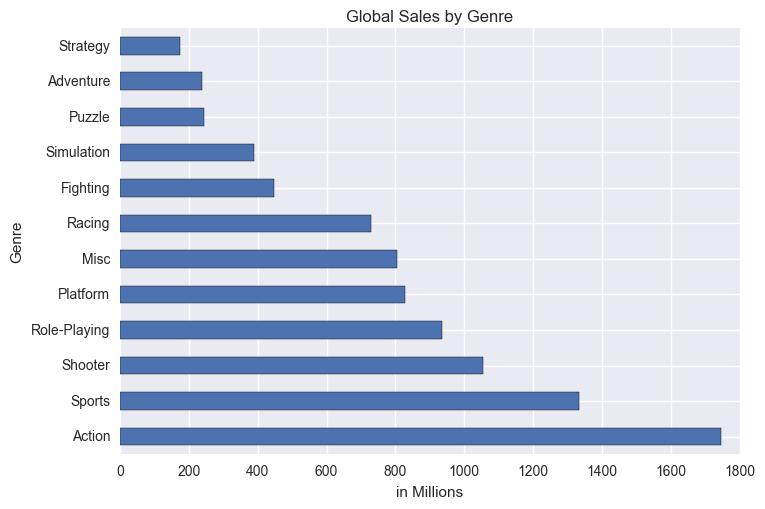

In [6]:
sales = v.groupby(['Genre']).Global_Sales.sum().sort_index().sort_values(ascending=False).plot(kind='barh', title='Global Sales by Genre').set_xlabel('in Millions')


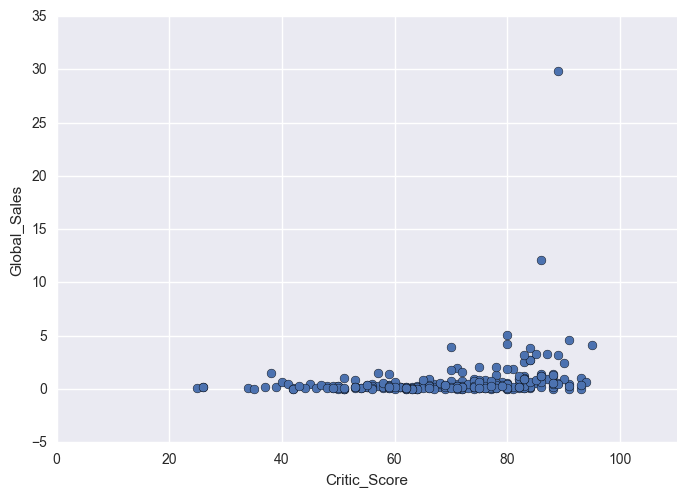

In [7]:
#can we use rating to predict sales?

#salesdec[salesdec.Critic_Score.isnull==True]

#http://www.metacritic.com/about-metascores


rand_sam = salesdec.sample(n=500)

rand_sam.plot.scatter(x='Critic_Score', y='Global_Sales', s=40, xlim=[0,110])
#NaN are dropped when DF plots a scatter

#QUESTION: how to zoom in because the lowest global sale is at 0.01



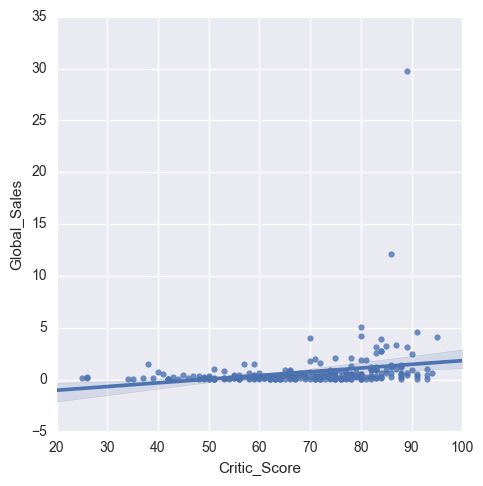

In [8]:
sns.lmplot(x='Critic_Score', y='Global_Sales', data=rand_sam)

In [9]:
#deleting the following: ratings are missing and cannot be contributed the overall correlation 
#cannot interpolate either 

crnan = salesdec[salesdec.Critic_Score.isnull()==True]
crnan

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,NaN,NaN,NaN,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25,NaN,NaN,NaN,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,NaN,NaN,NaN,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,NaN,NaN,NaN,NaN,NaN,NaN


## Platform Sales
    Which platforms preformed the best in terms of sales.
    What are the platforms for the top 10 games (by sales)? Look at the user count for each platform
    and for each game

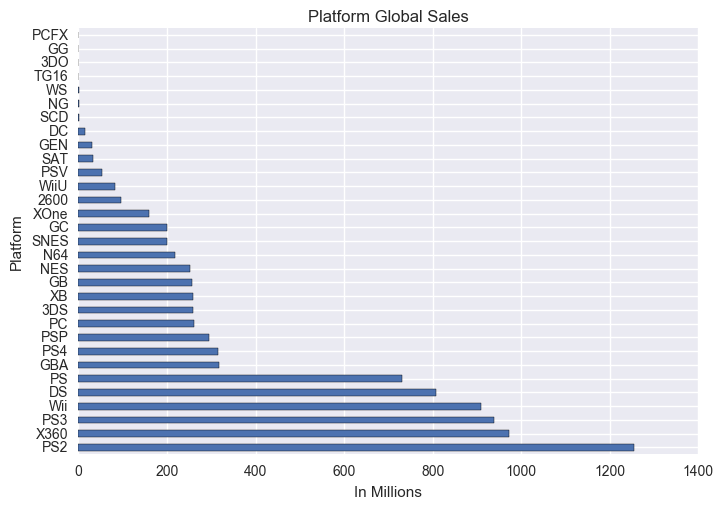

In [10]:
plat_sales = salesdec.groupby(['Platform']).Global_Sales.sum().sort_index()
plat_sales.sort_values(ascending=False).plot(kind='barh', title='Platform Global Sales').set_xlabel('In Millions')

In [11]:
salesdec.Platform.value_counts() #platforms 

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

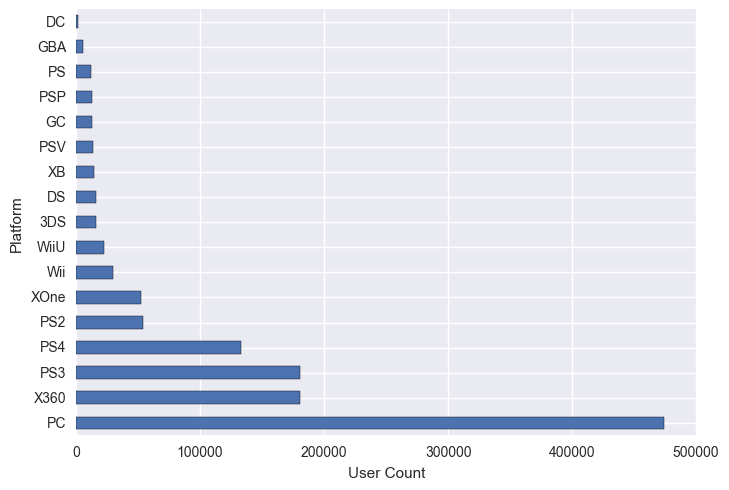

In [12]:
plat_user = salesdec.groupby(['Platform']).User_Count.sum().sort_index()
plat_user = plat_user.dropna().sort_values(ascending=False) # have some NaN values 
plat_user.plot(kind='barh').set_xlabel('User Count')

#this is user count by the number of users who gave a rating
#can we correlate the number of users who gave a rating to the overall rating

In [13]:
#finding the top 20 games

top_20games = salesdec[['Name','Global_Sales','User_Count','User_Score','Platform']].dropna()
top_20games.head(20)


,Name,Global_Sales,User_Count,User_Score,Platform
0,Wii Sports,82.53,322.0,8,Wii
2,Mario Kart Wii,35.52,709.0,8.3,Wii
3,Wii Sports Resort,32.77,192.0,8,Wii
6,New Super Mario Bros.,29.80,431.0,8.5,DS
7,Wii Play,28.92,129.0,6.6,Wii
8,New Super Mario Bros. Wii,28.32,594.0,8.4,Wii
11,Mario Kart DS,23.21,464.0,8.6,DS
13,Wii Fit,22.70,146.0,7.7,Wii
14,Kinect Adventures!,21.81,106.0,6.3,X360
15,Wii Fit Plus,21.79,52.0,7.4,Wii


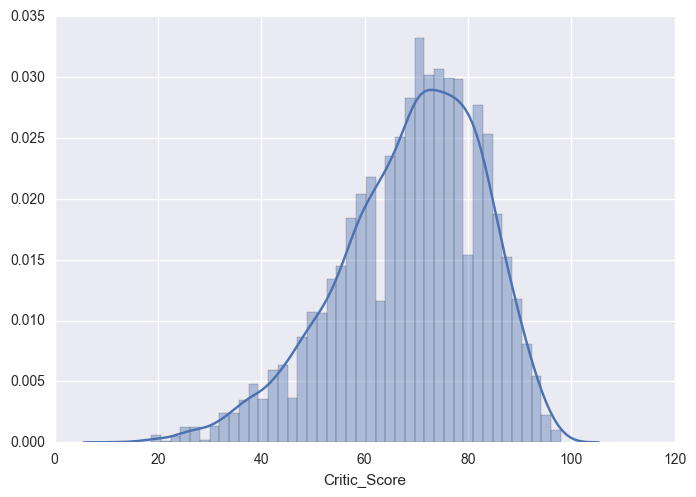

In [108]:
#distribution of critic and user score

crit_score = salesdec.Critic_Score.dropna()
sns.distplot(crit_score)



#used squart root (n) to find optimal bin size

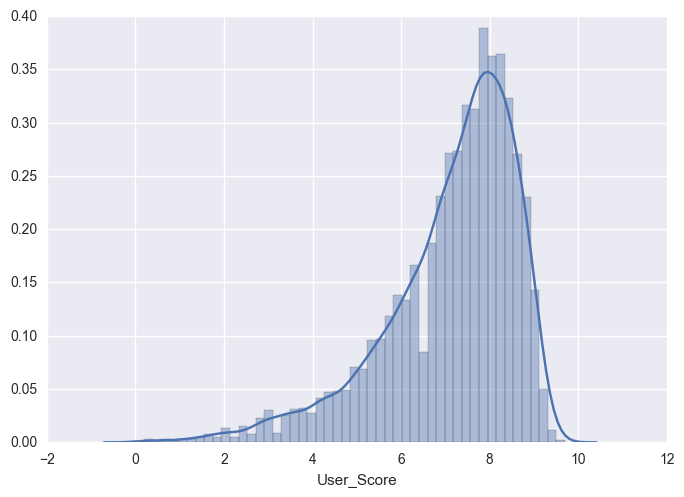

In [105]:
user_score = salesdec.User_Score.dropna()
user = user_score[user_score !='tbd']
user = user.astype(float)

#len(user)
sns.distplot(user)

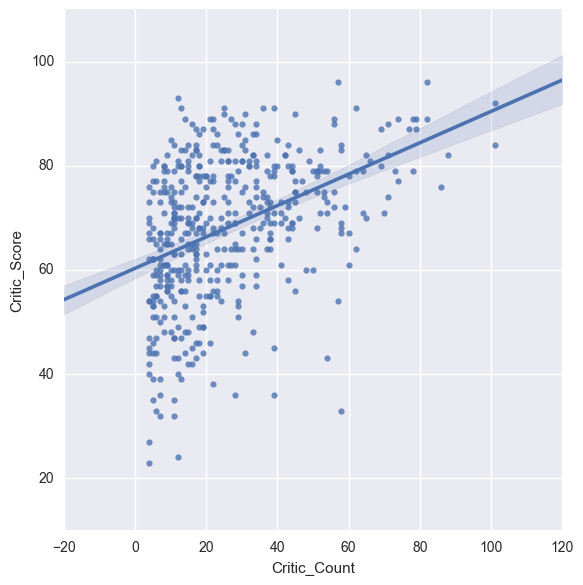

In [21]:
x = salesdec.Critic_Count.dropna()
y = crit_score

rans = salesdec.sample(n=1000)
#rans.plot.scatter(x='Critic_Count', y='Critic_Score')

#sales = sns.load_dataset("salesdec")
g = sns.lmplot(x='Critic_Count', y='Critic_Score', data=rans, size=6)